> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (TMDB Movies Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>  Here is the dataset i have selected is about movies show a lot of movies and their popularity , revenue genres, productiona company ...etc, so i found this is so useful to extract many good information.First i started by asking many questions which are: 

>
>
>
> Q1: Movie production trend over the years
>
>
> Q2: Top 10 movies have the hieghst revenue
>
>
>Q3: Does movie has to be popular to get high revenue

In [18]:
#Download the wanted libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Wrangling

> I did many cleaning steps which are:
>
>
>Change the datatype 
>
>Drop the unnecessary columns
>
>Delete duplicate rows
>
>change 0 values into null


In [19]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
data = pd.read_csv('tmdb-movies.csv', \
                  parse_dates=['release_year'])#converting the data type

In [20]:
data.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015-01-01,1.379999e+08,1.392446e+09



### Data Cleaning (Delete unnecessary columns)

In [21]:
#deleting the columns
data= data.drop([ 'id', 'imdb_id', 'cast', 'budget_adj','release_date','revenue_adj','tagline', 'homepage', 'keywords', 'overview', 'vote_count', 'vote_average'],1)
data.head(2)


,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-01-01
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-01-01


In [22]:
#lets check if the join successed 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_year            10866 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 764.1+ KB


In [23]:
### Data Cleaning (Delete duplicate rows)

In [24]:
data.shape

(10866, 9)

In [25]:
data.drop_duplicates(keep ='first', inplace=True)
sum(data.duplicated())#checking is deleting duplicate successed

0

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 : Movie production trend over the years

In [26]:
import matplotlib.pyplot as plt

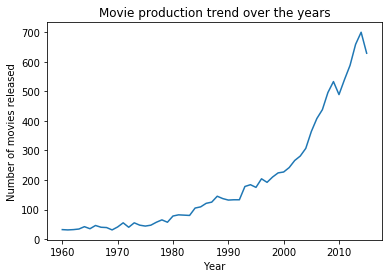

In [27]:
movies_year= data['release_year'].value_counts().sort_index();
plt.plot(movies_year);
plt.title('Movie production trend over the years');
plt.xlabel('Year');
plt.ylabel('Number of movies released');

>Movie production increasing over the years

In [29]:

### Research Question 2  (Top 10 movies have the highest revenue)

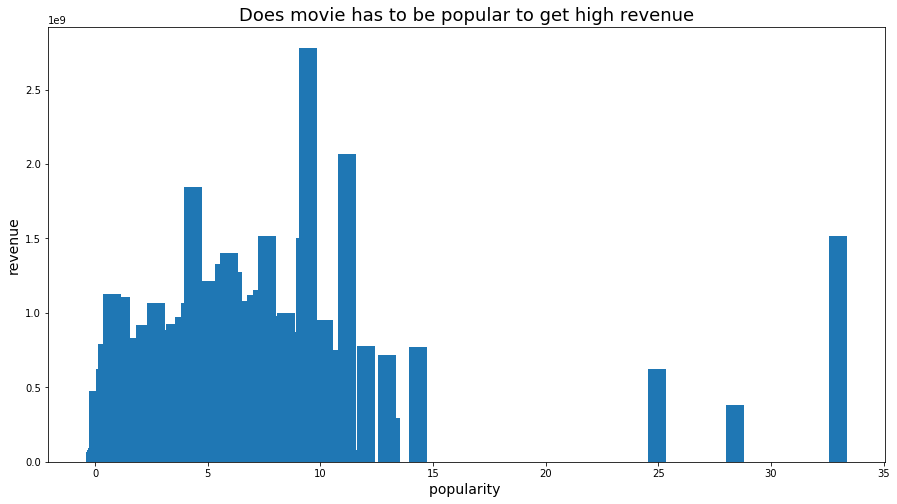

In [30]:
plt.figure(figsize=(15, 8))
plt.bar(data.popularity,data.revenue )
plt.xlabel("popularity ", fontsize=14)
plt.ylabel("revenue", fontsize=14)
plt.title("Does movie has to be popular to get high revenue",fontsize=18)
plt.show()

>here i can notied that there's no relationship between the popularity and revenue 
>
>because the movie that's got the highest popularity wasn't the top one in highest revenue



### Research Question 3  (Top 10 movies have the highest revenue)

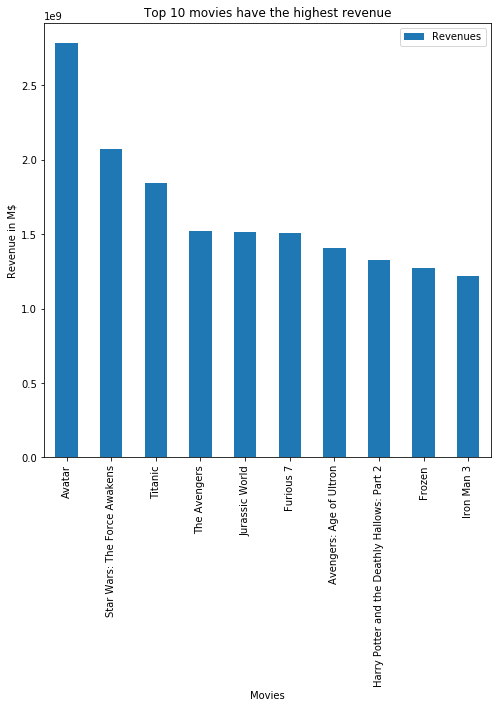

In [32]:
#sorting the revenues and take the top 10 
sorted_revenue = data['revenue'].sort_values(ascending=False)[:10]

#make empty lists
titles=[]
revenues=[]
#make new data frame
new_df=pd.DataFrame()
#make loop to go through the original data frame and choose only the required info and put them in the lists
for i in sorted_revenue.index:
    titles.append(data.loc[i,'original_title'])
    revenues.append(sorted_revenue.loc[i])
    #take the lists and put them in data frame
new_df['Movies']=titles
new_df['Revenues']=revenues
new_df.set_index('Movies',inplace=True)
new_df.plot(kind ='bar',figsize=(8,8))#plot them
plt.title('Top 10 movies have the highest revenue');
plt.ylabel('Revenue in M$');

> here i can noticed that the top 10 movies got the highest revenue,
>
>so Avatar is the highest and Iron Man3 is the least

<a id='conclusions'></a>
## Conclusions

> I checked the movie production over year, so i noticed that starting from 1980 has begin increased until 2010 started decreasing which is something really grab my attention why it's becoming decreasing .
>
>I even wanted to know high revenue based on what? is the popularity something may affects? so i concluded that there is no relationship between theese, the company will not pay based on popularity
>
>My curusity mind wanted to know the top 10 movies have the highest revenue, so i found Avatar got the highest revenue also it was released in 2009 so based on my question 1 where i noticed that 2009-2010 are the most movies are realesed in, so it will be so logical to be the highest revenue movie released in the most year has realesing movies.
>
## Limitations:
>The size was so enough to take my decisions also the null values don't effect, but the columns weren't enough i think if there are a coloumn shows reviews out of 10 and a column shows if the movie got the Oskars award or not they will be so helpful.